<a href="https://colab.research.google.com/github/Raffa-R/Deep-Learning-Project-Regression-and-Classification-with-Random-Dataset/blob/main/Copy_of_DL2024_Tugas_2_10120021_Muhammad_Raffa_Reyhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresi Linear dan Non-Linear

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy import stats

In [ ]:
#Data Regresi Non Linear
df1 = pd.read_excel('input_data_regresi_linear.xlsx')
df1 = df1.sort_values(by='X',ignore_index=True)
df1 = pd.DataFrame(df1)
# print("Data Regresi Non Linear")
# print(data_rnl)

#Data Regresi Non Linear
df2 = pd.read_excel('input_data_regresi_nonlinear.xlsx')
df2 = df2.sort_values(by='X',ignore_index=True)
df2 = pd.DataFrame(df2)
# print("Data Regresi Non Linear")
# print(data_rnl)


In [ ]:
# Activation functions and their derivatives
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sin(x):
  return np.sin(x)

def sin_derivative(x):
  return np.cos(x)

def tanH(x):
  return np.tanh(x)

def tanh_derivative(x):
  return 1-np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def linear(x):
    return x

def linear_derivative(x):
    return np.ones_like(x)

def arctan(x):
  return np.arctan(x)

def arctan_derivative(x):
  return 1 / x**2 + 1

# Mapping activation functions and their derivatives
activation_functions = {
    'relu': (relu, relu_derivative),
    'sigmoid': (sigmoid, sigmoid_derivative),
    'linear': (linear, linear_derivative),
    'sin' : (sin,sin_derivative),
    'tanh' : (tanH,tanh_derivative),
    'arctan' : (arctan,arctan_derivative)
}

# Loss function
def mse_loss(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Multi-Layer Perceptron class
class MLP:
    def __init__(self, layer_sizes, activation_funcs):
        self.layer_sizes = layer_sizes
        self.weights = [np.random.randn(size_in, size_out) * np.sqrt(2. / size_in) for size_in, size_out in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.zeros((1, size)) for size in layer_sizes[1:]]
        self.activations = [activation_functions[func][0] for func in activation_funcs]
        self.derivatives = [activation_functions[func][1] for func in activation_funcs]
        self.loss_history = []  # To store the loss after each epoch

    def forward(self, X):
        a = X
        for w, b, activation in zip(self.weights, self.biases, self.activations):
            z = np.dot(a, w) + b
            a = activation(z)
        return a

    def backward(self, X, y):
        m = y.shape[0]
        # Forward pass
        activations = [X]
        zs = []
        for w, b, activation in zip(self.weights, self.biases, self.activations):
            z = np.dot(activations[-1], w) + b
            zs.append(z)
            a = activation(z)
            activations.append(a)
        # Backward pass
        delta = (activations[-1] - y) / m
        deltas = [delta]
        for i in range(len(self.weights) - 1, 0, -1):
            delta = np.dot(deltas[0], self.weights[i].T) * self.derivatives[i-1](zs[i-1])
            deltas.insert(0, delta)
        weight_gradients = [np.dot(activations[i].T, deltas[i]) for i in range(len(self.weights))]
        bias_gradients = [np.sum(deltas[i], axis=0) for i in range(len(self.biases))]
        return weight_gradients, bias_gradients

    def update_parameters(self, grads, learning_rate):
        weight_gradients, bias_gradients = grads
        self.weights = [w - learning_rate * grad for w, grad in zip(self.weights, weight_gradients)]
        self.biases = [b - learning_rate * grad for b, grad in zip(self.biases, bias_gradients)]

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            grads = self.backward(X, y)
            self.update_parameters(grads, learning_rate)
            loss = mse_loss(y, self.forward(X))
            self.loss_history.append(loss)
            if epoch % 2000 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

**Regresi Linear**

In [ ]:
np.random.seed(202403)

# Data non linear
X = df1['X'].to_numpy().reshape(-1,1)
# print(X)
y = df1['y'].to_numpy().reshape(-1,1)
# print(len(y))


# Initialize and train the model
#Nonlinear
layer_sizes = [1, 1]
activation_funcs = ['linear']  # Specify activation functions for each layer
mlp = MLP(layer_sizes, activation_funcs)
mlp.train(X, y, epochs=20001, learning_rate=(0.1))

Epoch 0, Loss: 46.78264152798197
Epoch 2000, Loss: 0.9450108593445431
Epoch 4000, Loss: 0.9450108593445431
Epoch 6000, Loss: 0.9450108593445431
Epoch 8000, Loss: 0.9450108593445431
Epoch 10000, Loss: 0.9450108593445431
Epoch 12000, Loss: 0.9450108593445431
Epoch 14000, Loss: 0.9450108593445431
Epoch 16000, Loss: 0.9450108593445431
Epoch 18000, Loss: 0.9450108593445431
Epoch 20000, Loss: 0.9450108593445431


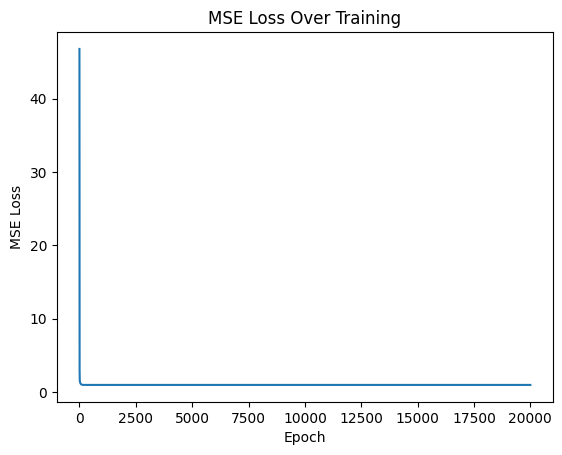

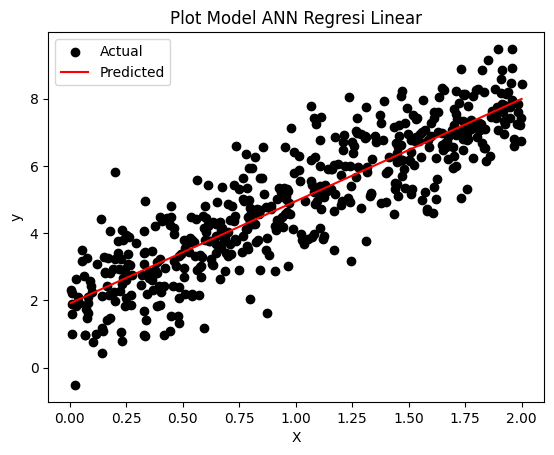

In [ ]:
# Plotting the loss history
plt.plot(mlp.loss_history)
plt.title("MSE Loss Over Training")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

# Prediction and plotting results
predictions = mlp.forward(X)
plt.scatter(X,y,color='black', label='Actual')
plt.plot(X,predictions, color='red', label='Predicted')
plt.title('Plot Model ANN Regresi Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
# print(predictions)

In [ ]:
np.random.seed(202403)

# Data non linear
X = df2['X'].to_numpy().reshape(-1,1)
# print(X)
y = df2['y'].to_numpy().reshape(-1,1)
# print(len(y))


# Initialize and train the model
#Nonlinear
layer_sizes = [1, 10, 1]
activation_funcs = ['sigmoid','linear']  # Specify activation functions for each layer
mlp = MLP(layer_sizes, activation_funcs)
mlp.train(X, y, epochs=50001, learning_rate=(0.1))

Epoch 0, Loss: 7.255506142654062
Epoch 2000, Loss: 5.524508903286003
Epoch 4000, Loss: 3.6491391716306234
Epoch 6000, Loss: 2.3708383625236875
Epoch 8000, Loss: 2.265693656809422
Epoch 10000, Loss: 2.2605544038209078
Epoch 12000, Loss: 2.231848883018284
Epoch 14000, Loss: 2.201883280279444
Epoch 16000, Loss: 2.174069858690996
Epoch 18000, Loss: 2.1500227326175043
Epoch 20000, Loss: 2.130233989107245
Epoch 22000, Loss: 2.1145999403878104
Epoch 24000, Loss: 2.102626914286
Epoch 26000, Loss: 2.0936566871016247
Epoch 28000, Loss: 2.0870304507510897
Epoch 30000, Loss: 2.0821728406986213
Epoch 32000, Loss: 2.078619336061728
Epoch 34000, Loss: 2.0760130731425135
Epoch 36000, Loss: 2.074088764532471
Epoch 38000, Loss: 2.072653487772711
Epoch 40000, Loss: 2.0715689278901115
Epoch 42000, Loss: 2.0707367482987085
Epoch 44000, Loss: 2.0700873041324894
Epoch 46000, Loss: 2.0695712859759476
Epoch 48000, Loss: 2.0691536957559573
Epoch 50000, Loss: 2.068809576439067


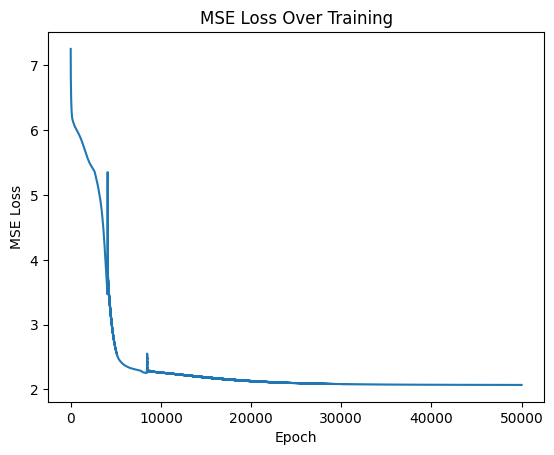

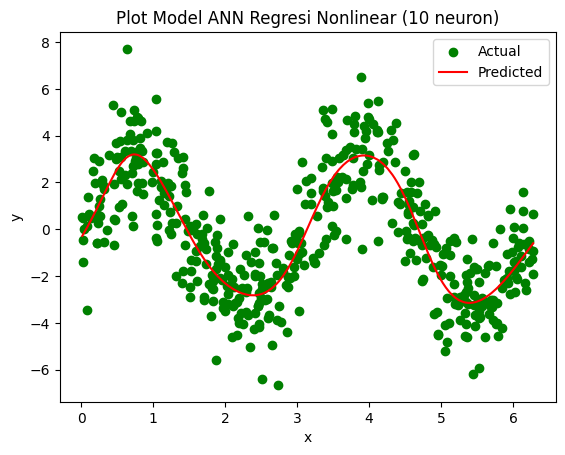

In [ ]:
# Plotting the loss history
plt.plot(mlp.loss_history)
plt.title("MSE Loss Over Training")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()
# Prediction and plotting results
predictions = mlp.forward(X)
plt.scatter(X,y,color='green' ,label='Actual')
plt.plot(X,predictions, color='red', label='Predicted')
plt.title('Plot Model ANN Regresi Nonlinear (10 neuron)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
# print(predictions)

# Klasifikasi Linear dan Non-linear.

In [ ]:
df3 = pd.read_excel('input_data_classification_linear_with_labels.xlsx')
df4 = pd.read_excel('input_data_classification_nonlinear_with_labels.xlsx')

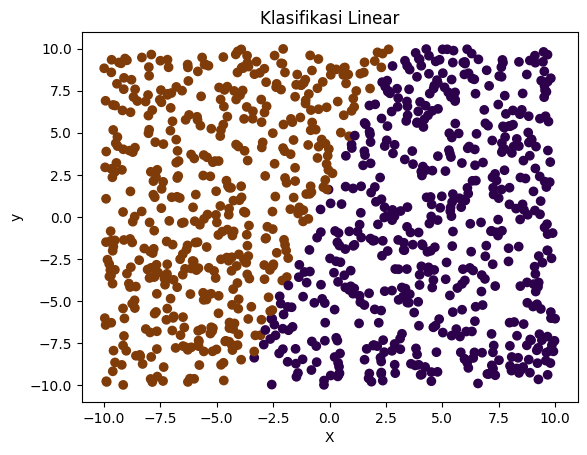

In [ ]:
features_l = np.array([df3["X"],df3["y"]])
labels_l = np.array(df3['Label'])

labels_l = np.array(labels_l).reshape((1,len(labels_l)))

plt.scatter(features_l[0], features_l[1], c=labels_l[0], cmap='PuOr_r', marker='o')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Klasifikasi Linear')
plt.show()

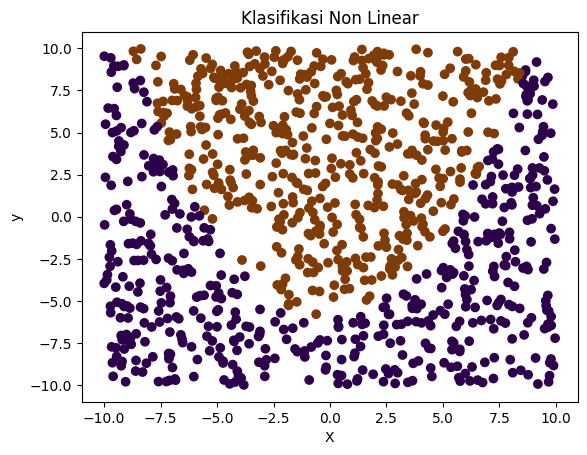

In [ ]:
features_nl = np.array([df4["X"],df4["y"]])
labels_nl = np.array(df4['Label'])

labels_nl = np.array(labels_nl).reshape((1,len(labels_nl)))

plt.scatter(features_nl[0], features_nl[1], c=labels_nl[0], cmap='PuOr_r', marker='o')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Klasifikasi Non Linear')
plt.show()

In [ ]:
# Softmax function
def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    m = y_pred.shape[0]
    log_likelihood = -(y_true * np.log(y_pred))  # Adding a small constant to avoid log(0)
    loss = np.sum(log_likelihood) / m
    return loss

# One-hot encoding
def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

# Accuracy calculation
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

class SimpleMLP:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.weights = []
        self.biases = []

        # Initialize weights and biases for each layer
        for i in range(len(layer_sizes) - 1):
            self.weights.append(np.random.randn(layer_sizes[i], layer_sizes[i + 1]) * 0.01)
            self.biases.append(np.zeros((1, layer_sizes[i + 1])))

    def feedforward(self, X):
        activation = X
        for i in range(len(self.weights)):
            z = np.dot(activation, self.weights[i]) + self.biases[i]
            activation = softmax(z)  # Using softmax for all layers
        return activation

    def backpropagation(self, X, y, learning_rate):
        m = X.shape[0]
        # Forward pass
        activations = [X]
        zs = []  # to store all z vectors layer by layer

        for i in range(len(self.weights)):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            activations.append(softmax(z))  # Using softmax for all layers
            zs.append(z)

        # Backward pass
        delta = activations[-1] - one_hot(y, self.layer_sizes[-1])
        for l in range(len(self.weights) - 1, -1, -1):
            delta_w = np.dot(activations[l].T, delta) / m
            delta_b = np.sum(delta, axis=0, keepdims=True) / m
            self.weights[l] -= learning_rate * delta_w
            self.biases[l] -= learning_rate * delta_b

            if l > 0:
                # Derivative of softmax
                delta = np.dot(delta, self.weights[l].T) * activations[l] * (1 - activations[l])

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            if epoch % 2000 == 0:
                loss = cross_entropy_loss(one_hot(y, self.layer_sizes[-1]), output)
                print(f"Epoch {epoch}, Loss: {loss}")

**Klasifikasi Linear**

In [ ]:
# Set the seed for reproducibility
np.random.seed(202403)

#linear classification
x_l = df3['X']
y_l = df3['y']
features_l = np.column_stack([x_l,y_l])
labels = df3['Label']


# Split the dataset manually
split_ratio = 0.7
split_index = int(len(features_l) * split_ratio)
X_train, X_test = features_l[:split_index], features_l[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

# Training the model
layer_sizes = [2, 2]
mlp = SimpleMLP(layer_sizes)
mlp.train(X_train, y_train, epochs=20000, learning_rate=0.1)

# Evaluating the model
y_pred = np.argmax(mlp.feedforward(X_test), axis=1)
test_accuracy = np.mean(y_test == y_pred)
print(f"Test Accuracy: {test_accuracy}")

Epoch 0, Loss: 0.8026611941430919
Epoch 2000, Loss: 0.022599476494297954
Epoch 4000, Loss: 0.018051987576453883
Epoch 6000, Loss: 0.015876128884272173
Epoch 8000, Loss: 0.014513943009263721
Epoch 10000, Loss: 0.013548691873871576
Epoch 12000, Loss: 0.012813500254818873
Epoch 14000, Loss: 0.012226337115801485
Epoch 16000, Loss: 0.011741391244966409
Epoch 18000, Loss: 0.011330728314301224
Test Accuracy: 1.0


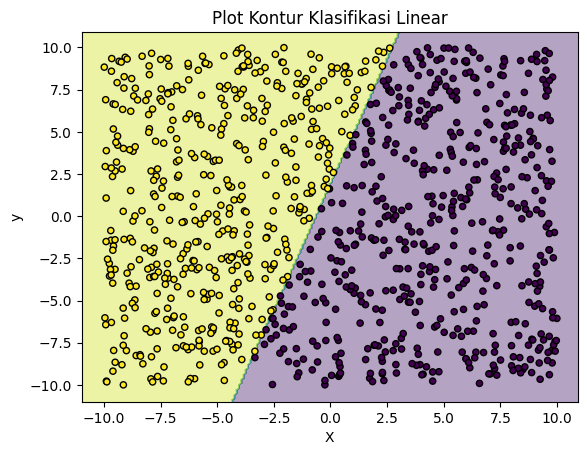

In [ ]:
# Define a mesh grid for the contour plot
x_min, x_max = features_l[:, 0].min() - 1, features_l[:, 0].max() + 1
y_min, y_max = features_l[:, 1].min() - 1, features_l[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the labels for each point in the mesh grid
Z = np.argmax(mlp.feedforward(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)

# Plot the contour plot
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(features_l[:, 0], features_l[:, 1], c=labels, s=20, edgecolors='k')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Plot Kontur Klasifikasi Linear')
#plt.colorbar()
plt.show()

Klasifikasi Non Linear

In [ ]:
# Set the seed for reproducibility
np.random.seed(202403)

#linear classification
x_nl = df4['X']
y_nl = df4['y']
features_nl = np.column_stack([x_nl,y_nl])
labels = df4['Label']


# Split the dataset manually
split_ratio = 0.7
split_index = int(len(features_nl) * split_ratio)
X_train, X_test = features_nl[:split_index], features_nl[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

# Training the model
layer_sizes = [2, 20, 2]  # 26 input features, two hidden layers with 20 neurons each, and 2 output neurons
mlp = SimpleMLP(layer_sizes)
mlp.train(X_train, y_train, epochs=50000, learning_rate=0.01)

# Evaluating the model
y_pred = np.argmax(mlp.feedforward(X_test), axis=1)
test_accuracy = np.mean(y_test == y_pred)
print(f"Test Accuracy: {test_accuracy}")

Epoch 0, Loss: 0.6931914634153206
Epoch 2000, Loss: 0.6805500070559259
Epoch 4000, Loss: 0.4830936377622159
Epoch 6000, Loss: 0.46823496480482657
Epoch 8000, Loss: 0.4644107357331767
Epoch 10000, Loss: 0.46174609451823967
Epoch 12000, Loss: 0.38371486725588333
Epoch 14000, Loss: 0.3129286124801348
Epoch 16000, Loss: 0.27075691599323837
Epoch 18000, Loss: 0.23648314553791694
Epoch 20000, Loss: 0.20690414372178614
Epoch 22000, Loss: 0.18150670263956264
Epoch 24000, Loss: 0.16130583715891209
Epoch 26000, Loss: 0.14706218528244636
Epoch 28000, Loss: 0.1367462507273907
Epoch 30000, Loss: 0.12887767918036
Epoch 32000, Loss: 0.12273573745046237
Epoch 34000, Loss: 0.11791606274403685
Epoch 36000, Loss: 0.11414135404511436
Epoch 38000, Loss: 0.11119953422876254
Epoch 40000, Loss: 0.10892517171215774
Epoch 42000, Loss: 0.10718908260387618
Epoch 44000, Loss: 0.10588917308023596
Epoch 46000, Loss: 0.10494356775735657
Epoch 48000, Loss: 0.10428618202816758
Test Accuracy: 0.9533333333333334


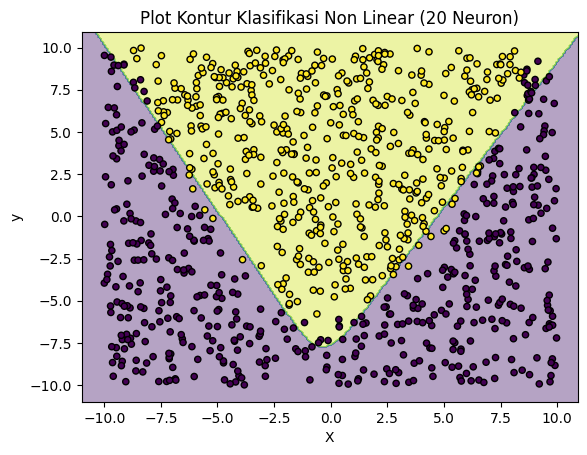

In [ ]:
# Define a mesh grid for the contour plot
x_min, x_max = features_nl[:, 0].min() - 1, features_nl[:, 0].max() + 1
y_min, y_max = features_nl[:, 1].min() - 1, features_nl[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the labels for each point in the mesh grid
Z = np.argmax(mlp.feedforward(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)

# Plot the contour plot
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(features_nl[:, 0], features_nl[:, 1], c=labels, s=20, edgecolors='k')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Plot Kontur Klasifikasi Non Linear (20 Neuron)')
#plt.colorbar()
plt.show()